# CS229 Project Lending Club Data Analysis
## 1. Dataset overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
%matplotlib inline

In [5]:
df = pd.read_csv('loan.csv')
df.head()

/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(887379, 74)

In [3]:
list(df)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

## 2. Feature Engineering
### Process target column

In [5]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [6]:
def target_handler(df):
    if df['loan_status'] == 'Fully Paid':
        return 1
    elif df['loan_status'] in ('Default', 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off'):
        return -1
    elif df['loan_status'] in ('In Grace Period', 'Current','ssued'):
        return 0

df['target'] = df.apply(target_handler, axis=1)
df['target'].value_counts(dropna=False)

 0.0    608032
 1.0    207723
-1.0     60415
NaN      11209
Name: target, dtype: int64

In [20]:
# Only include +1 and -1
df.dropna(subset=['target'], how='all', inplace=True)
df = df[(df['target'] == 1.0) | (df['target'] == -1.0)]
df['target'].value_counts(dropna=False)

 1.0    200351
-1.0     56958
Name: target, dtype: int64

### Process predictors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c996e50>]], dtype=object)

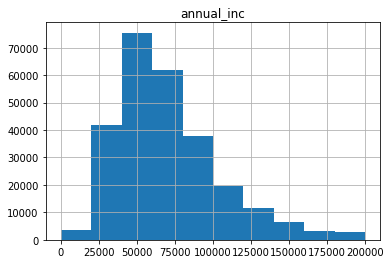

In [33]:
df.annual_inc.value_counts(sort=True)
df.hist(column='annual_inc', bins=10, range=(0,200000.0))

Code categorical variables

In [48]:
print df.home_ownership.value_counts(dropna=False) # useful
print df.pymnt_plan.value_counts(dropna=False) # not useful
print df.purpose.value_counts(dropna=False) # useful
print df.grade.value_counts(dropna=False) # reserved 
print df.sub_grade.value_counts(dropna=False) # useful
print df.emp_length.value_counts(dropna=False) # useful

MORTGAGE    126490
RENT        108955
OWN          21683
OTHER          138
NONE            42
ANY              1
Name: home_ownership, dtype: int64
n    257302
y         7
Name: pymnt_plan, dtype: int64
debt_consolidation    152284
credit_card            50406
home_improvement       14997
other                  14290
major_purchase          6262
small_business          4874
car                     3587
medical                 2835
moving                  2033
wedding                 1938
house                   1668
vacation                1558
educational              317
renewable_energy         260
Name: purpose, dtype: int64
B    75533
C    66841
D    42333
A    41326
E    20758
F     8346
G     2172
Name: grade, dtype: int64
B3    17831
B4    16933
C1    15109
C2    14609
B2    14478
B5    14359
C3    13105
C4    12467
B1    11932
A5    11845
C5    11551
A4    10798
D1    10420
D2     9436
D3     8244
D4     7816
A3     6983
D5     6417
A2     6051
A1     5649
E1     5097
E2     

In [79]:
print df.inq_last_12m.value_counts(dropna=False) # not useful
print df.inq_fi.value_counts(dropna=False) # not useful
print df.total_cu_tl.value_counts(dropna=False) # not useful
print df.application_type.value_counts(dropna=False) # not useful
print df.acc_now_delinq.value_counts(dropna=False) # not useful? 800 record only
print df.addr_state.value_counts(dropna=False) # useful -> categorical
print df.verification_status.value_counts(dropna=False) # useful -> categorical
print df.delinq_2yrs.value_counts(dropna=False) # useful
print df.open_rv_24m.value_counts(dropna=False) # not useful
print df.installment.value_counts(dropna=False) # ??? -> need to bin if we want to use it
print df.pub_rec.value_counts(dropna=False) # useful

NaN      257175
 2.0         27
 1.0         22
 0.0         18
 3.0         18
-4.0         14
 6.0          8
 4.0          6
 7.0          6
 5.0          4
 10.0         3
 12.0         2
 19.0         1
 16.0         1
 13.0         1
 8.0          1
 15.0         1
 11.0         1
Name: inq_last_12m, dtype: int64
NaN     257175
 0.0        59
 1.0        42
 2.0        12
 3.0         6
 4.0         5
 5.0         4
 7.0         3
 6.0         2
 9.0         1
Name: inq_fi, dtype: int64
NaN      257175
 0.0         70
 1.0         17
 2.0         16
 3.0          7
 4.0          5
 12.0         3
 6.0          2
 7.0          2
 5.0          2
 8.0          2
 13.0         1
 18.0         1
 21.0         1
 17.0         1
 10.0         1
 11.0         1
 9.0          1
 15.0         1
Name: total_cu_tl, dtype: int64
INDIVIDUAL    257306
JOINT              3
Name: application_type, dtype: int64
0.0    256502
1.0       761
2.0        40
3.0         3
5.0         2
4.0         1
Nam

In [21]:
# One hot encoding for non-ordinal categorical variables
home = pd.get_dummies(df.home_ownership,prefix='home_')
purpose = pd.get_dummies(df.purpose,prefix='purpose_')
veri_status = pd.get_dummies(df.verification_status)

# Label encoding for ordinal categorical variables
df.dropna(subset=['emp_length'], how='all', inplace=True)
emp_length_ord = ['< 1 year', '1 year','2 years', '3 years','4 years','5 years', '6 years','7 years', '8 years', '9 years','10+ years']
df.emp_length = pd.Categorical(df.emp_length, ordered=True, categories=emp_length_ord)
df.emp_length = pd.factorize(df.emp_length, sort=True)[0]

# A1 = 0, ..., G5 = 34
df.dropna(subset=['sub_grade'], how='all', inplace=True)
df.sub_grade = pd.Categorical(df.sub_grade, ordered=True)
df.sub_grade = pd.factorize(df.sub_grade, sort=True)[0]

/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  if __name__ == '__main__':
/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  if __name__ == '__main__':


In [33]:
predictor=pd.concat([df.annual_inc, df.emp_length, df.sub_grade, df.pub_rec, df.delinq_2yrs, home, purpose],axis=1)
predictor.loc[:10]

,annual_inc,emp_length,sub_grade,pub_rec,delinq_2yrs,home__ANY,home__MORTGAGE,home__NONE,home__OTHER,home__OWN,...,purpose__home_improvement,purpose__house,purpose__major_purchase,purpose__medical,purpose__moving,purpose__other,purpose__renewable_energy,purpose__small_business,purpose__vacation,purpose__wedding
0,24000.0,0,6,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,0,13,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12252.0,0,14,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,49200.0,0,10,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,36000.0,0,3,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,48000.0,0,20,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,40000.0,0,26,0.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,15000.0,0,9,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,72000.0,0,12,0.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 3. Train and evaluate models
### Train-test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(predictor, df['target'], test_size=0.2)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(205847, 25)
(51462, 25)
(205847,)
(51462,)


### Choosing and evaluating models

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, f1_score
def evaluateModel(Y_test,Y_predict):
    print 'Accuracy: ', round(accuracy_score(Y_test,Y_predict),2)
    print 'Precission: ', round(precision_score(Y_test,Y_predict),2)
    print 'Recall: ', round(recall_score(Y_test,Y_predict),2)
    print 'ROC_AUC score: ', round(roc_auc_score(Y_test,Y_predict),2)
    print 'f-score: ', round(f1_score(Y_test,Y_predict),2)
    print (classification_report(Y_test,Y_predict))
    print (confusion_matrix(Y_test,Y_predict))

In [24]:
#for i in data:
#    print data[i].value_counts(dropna=False)

 1.0    200351
-1.0     56958
Name: target, dtype: int64
60000.00      10123
50000.00       8844
65000.00       7387
40000.00       7052
70000.00       6869
45000.00       6744
75000.00       6414
80000.00       6353
55000.00       6018
90000.00       4863
100000.00      4763
85000.00       4481
35000.00       4345
30000.00       4107
120000.00      3607
42000.00       3593
52000.00       3439
48000.00       3437
110000.00      3061
72000.00       2883
95000.00       2580
36000.00       2497
62000.00       2215
38000.00       2143
150000.00      2089
54000.00       2033
58000.00       1994
32000.00       1951
68000.00       1930
56000.00       1912
              ...  
85155.00          1
42546.00          1
85153.00          1
85152.00          1
64136.79          1
42572.00          1
42569.00          1
58951.00          1
77580.00          1
235800.00         1
124486.15         1
170260.00         1
32066.27          1
258940.00         1
1362000.00        1
20736.00          1
207

#### Logistic regression

In [36]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()
logit.fit(X_train, Y_train)
logit_pred = logit.predict(X_test)
evaluateModel(Y_test, logit_pred)
coef = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logit.coef_))], axis = 1)
coef.columns = ['Feature', 'Coefficient']
coef.sort_values(by=['Coefficient'], ascending=False, inplace=True)
print coef

Accuracy:  0.78
Precission:  0.78
Recall:  1.0
ROC_AUC score:  0.5
f-score:  0.88
             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00     11384
        1.0       0.78      1.00      0.88     40078

avg / total       0.61      0.78      0.68     51462

[[    0 11384]
 [    0 40078]]
                        Feature   Coefficient
0                    annual_inc  1.609170e-05
2                     sub_grade  9.128784e-10
13  purpose__debt_consolidation  1.641643e-10
6                home__MORTGAGE  1.572432e-10
10                   home__RENT  1.266397e-10
12         purpose__credit_card  8.064574e-11
3                       pub_rec  3.438152e-11
9                     home__OWN  2.823653e-11
4                   delinq_2yrs  2.425241e-11
15    purpose__home_improvement  1.802208e-11
20               purpose__other  1.571998e-11
17      purpose__major_purchase  1.208849e-11
11                 purpose__car  8.879662e-12
24             purpose__wedd

#### XGBoost

In [37]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=Y_train)
#sum_wneg = (Y_train == 0).sum()
#sum_wpos = (Y_train == 1).sum()
#spw = float(sum_wneg/sum_wpos)
xgb1 = xgb.XGBClassifier(min_child_weight=1, max_depth=6,
                    n_estimators=500, reg_alpha=0.001,
                    subsample=0.8)
#modelfit(xgb1, dtrain)
xgb1.fit(X_train, Y_train, eval_metric='auc')
xgb_pred1 = xgb1.predict(X_test)
evaluateModel(Y_test, xgb_pred1)

Accuracy:  0.78
Precission:  0.79
Recall:  0.98
ROC_AUC score:  0.52
f-score:  0.87
             precision    recall  f1-score   support

       -1.0       0.47      0.05      0.10     11384
        1.0       0.79      0.98      0.87     40078

avg / total       0.72      0.78      0.70     51462

[[  617 10767]
 [  683 39395]]


In [38]:
feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)
print feat_imp

annual_inc                     9021
sub_grade                      4755
delinq_2yrs                    1394
pub_rec                         851
purpose__debt_consolidation     603
home__RENT                      530
home__MORTGAGE                  523
purpose__credit_card            392
home__OWN                       341
purpose__small_business         266
purpose__other                  257
purpose__home_improvement       228
purpose__major_purchase         166
purpose__medical                131
purpose__car                    111
purpose__wedding                110
purpose__house                   92
purpose__moving                  87
purpose__vacation                81
purpose__renewable_energy        64
purpose__educational             53
home__OTHER                      29
home__NONE                       25
dtype: int64
